<a href="https://colab.research.google.com/github/eecoubrough/Keras_Assignment/blob/main/Part_3_trials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Medical Image Analysis Example
A simple convolutional neural network model trained using a simple pathology image dataset.

To use GPU acceleration make sure to change your runtime type in Google Colab to GPU.

## Python Imports
This section will load the necessary python packages to the instance.

In [24]:
# Built-in Imports
import random

# Library Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Keras Imports
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import get_file, to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

DATA_NAME = "BloodMNIST"

!wget https://raw.githubusercontent.com/MedMNIST/MedMNIST/main/medmnist/info.py
from info import INFO
data = INFO[DATA_NAME.lower()]

# Downloads the dataset file hosted on Zenodo.
file_path = get_file(fname="dataset.npz",
                     origin=data["url"],
                     md5_hash=data["MD5"])

# Loads the downloaded NumPy object.
dataset = np.load(file_path)

# Gets the training images and labels from the NumPy object.
train_x = dataset["train_images"]
train_y = dataset["train_labels"]

# Gets the validation images and labels from the NumPy object.
val_x = dataset["val_images"]
val_y = dataset["val_labels"]

# Gets the testing images and labels from the NumPy object.
test_x = dataset["test_images"]
test_y = dataset["test_labels"]

--2024-03-30 23:00:14--  https://raw.githubusercontent.com/MedMNIST/MedMNIST/main/medmnist/info.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27766 (27K) [text/plain]
Saving to: ‘info.py.2’

info.py.2           100%[===================>]  27.12K  --.-KB/s    in 0.002s  

2024-03-30 23:00:14 (15.9 MB/s) - ‘info.py.2’ saved [27766/27766]



In [25]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Preprocess the data
train_x = train_x.astype('float32') / 255.0
val_x = val_x.astype('float32') / 255.0
test_x = test_x.astype('float32') / 255.0

# Convert labels to one-hot encoding
num_classes = len(np.unique(train_y))
train_y = to_categorical(train_y, num_classes)
val_y = to_categorical(val_y, num_classes)
test_y = to_categorical(test_y, num_classes)

# Data Augmentation
train_datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow(train_x, train_y, batch_size=32)

# Model Architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training
history = model.fit(train_generator, epochs=10, validation_data=(val_x, val_y))

# Evaluation
test_loss, test_acc = model.evaluate(test_x, test_y)
print('Test accuracy:', test_acc)


Epoch 1/10
374/374 [==============================] - 10s 23ms/step - loss: 1.2413 - accuracy: 0.5318 - val_loss: 0.8360 - val_accuracy: 0.6951
Epoch 2/10
374/374 [==============================] - 8s 22ms/step - loss: 0.7766 - accuracy: 0.7088 - val_loss: 0.6686 - val_accuracy: 0.7459
Epoch 3/10
374/374 [==============================] - 7s 19ms/step - loss: 0.6286 - accuracy: 0.7640 - val_loss: 0.4747 - val_accuracy: 0.8271
Epoch 4/10
374/374 [==============================] - 8s 21ms/step - loss: 0.5710 - accuracy: 0.7867 - val_loss: 0.5724 - val_accuracy: 0.7845
Epoch 5/10
374/374 [==============================] - 8s 22ms/step - loss: 0.5317 - accuracy: 0.8012 - val_loss: 0.5570 - val_accuracy: 0.7757
Epoch 6/10
374/374 [==============================] - 7s 19ms/step - loss: 0.5005 - accuracy: 0.8114 - val_loss: 0.3851 - val_accuracy: 0.8540
Epoch 7/10
374/374 [==============================] - 7s 19ms/step - loss: 0.4683 - accuracy: 0.8287 - val_loss: 0.4415 - val_accuracy: 0.824

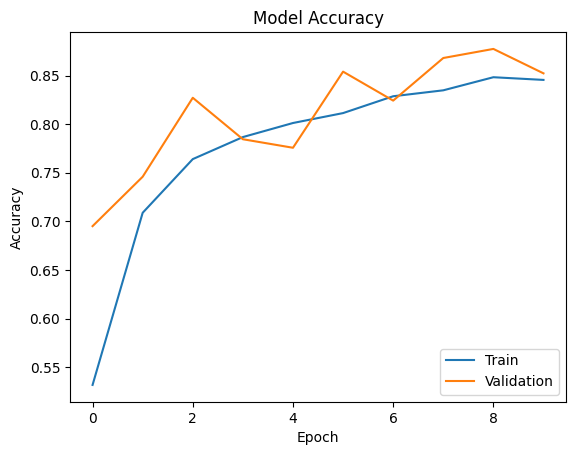

In [26]:
# Plots the training and validation accuracy over the number of epochs.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 576)              

In [9]:
# Built-in Imports
import random

In [10]:
# Library Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [11]:
# Keras Imports
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import get_file, to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Dataset Downloader
This section will download the selected [MedMNIST](https://medmnist.github.io/) dataset as a NumPy array object to your Google Colab instance.

To change the dataset that will download just change the variable DATA_NAME to desired dataset name.

All storage on a Google Colab instance is deleted when the instance ends so the dataset will need to be redownloaded each time an instance is created (Don't worry this usually takes about 20 seconds).

In [12]:
DATA_NAME = "BloodMNIST"

In [13]:
!wget https://raw.githubusercontent.com/MedMNIST/MedMNIST/main/medmnist/info.py
from info import INFO
data = INFO[DATA_NAME.lower()]

--2024-03-30 22:45:46--  https://raw.githubusercontent.com/MedMNIST/MedMNIST/main/medmnist/info.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27766 (27K) [text/plain]
Saving to: ‘info.py’

info.py             100%[===================>]  27.12K  --.-KB/s    in 0.001s  

2024-03-30 22:45:46 (18.5 MB/s) - ‘info.py’ saved [27766/27766]



In [14]:
# Downloads the dataset file hosted on Zenodo.
file_path = get_file(fname="dataset.npz",
                     origin=data["url"],
                     md5_hash=data["MD5"])

35461855/35461855 [==============================] - 3s 0us/step


In [18]:
# Loads the downloaded NumPy object.
dataset = np.load(file_path)

# Gets the training images and labels from the NumPy object.
train_x = dataset["train_images"]
train_y = dataset["train_labels"]

# Gets the validation images and labels from the NumPy object.
val_x = dataset["val_images"]
val_y = dataset["val_labels"]

# Gets the testing images and labels from the NumPy object.
test_x = dataset["test_images"]
test_y = dataset["test_labels"]

In [21]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Already loaded BloodMNIST dataset

# Reshape the data
train_x = train_x.reshape(-1, 28, 28, 1)
test_x = test_x.reshape(-1, 28, 28, 1)

# Normalize the pixel values to be between 0 and 1
train_x = train_x.astype('float32') / 255.0
test_x = test_x.astype('float32') / 255.0

# Convert labels to one-hot encoding
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

# Data Augmentation
train_datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow(train_images, train_labels, batch_size=32)

# Model Architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training
history = model.fit(train_generator, epochs=10, validation_data=(test_images, test_labels))

# Evaluation
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


NameError: name 'train_images' is not defined

## Data Exploration
In this section we have a look at our data, their distributions to see if it is ready to be used within our machine learning algorithm.

In [ ]:
# Declares a list of labels.
labels = list(data["label"].values()) + ["total"]

# Gets the counts for each label in each of our datasets.
_, train_counts = np.unique(train_y, return_counts=True)
_, val_counts = np.unique(val_y, return_counts=True)
_, test_counts = np.unique(test_y, return_counts=True)

# Prints the counts for each label from each dataset.
print(pd.DataFrame(list(zip(np.append(train_counts, [sum(train_counts)]),
                            np.append(val_counts, [sum(val_counts)]),
                            np.append(test_counts, [sum(test_counts)]))),
                   index=labels, columns=["Train", "Val", "Test"]))

                                                    Train   Val  Test
basophil                                              852   122   244
eosinophil                                           2181   312   624
erythroblast                                         1085   155   311
immature granulocytes(myelocytes, metamyelocyte...   2026   290   579
lymphocyte                                            849   122   243
monocyte                                              993   143   284
neutrophil                                           2330   333   666
platelet                                             1643   235   470
total                                               11959  1712  3421


2412: neutrophil


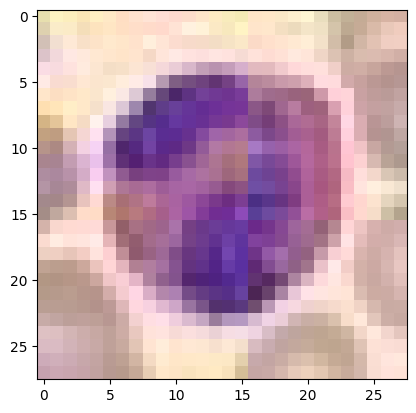

In [ ]:
# Displays a random image from training dataset.
index = random.randint(0, len(train_x))
print(f"{index}: {labels[train_y[index][0]]}")
plt.imshow(train_x[random.randint(0, len(train_x))])

## Data Processing
In this section we will create a data loader for algorithm that will dynamiclly load and augment the data when needed.

In [ ]:
# Defines the data generator that will be used to augment the images as they are loaded.
data_generator = ImageDataGenerator(featurewise_center=True,
                                    featurewise_std_normalization=True,
                                    horizontal_flip=True,
                                    vertical_flip=True)

In [ ]:
data_generator.fit(np.append(train_x, val_x, 0))

## Model Definition
In this section we will define the neural network arcitecture.

In [ ]:
# Define the input layer of the model with the size of an image.
input = layers.Input(shape=train_x[0].shape)

# Defines the first convolutional layer with max pooling.
conv_1 = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(input)
pool_1 = layers.MaxPool2D(pool_size=(2, 2))(conv_1)

# Defines the second convolutional layer with max pooling.
conv_2 = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(pool_1)
pool_2 = layers.MaxPool2D(pool_size=(2, 2))(conv_2)

# Flattens the outputs of the convolutoonal layers into a one dimensional array.
flatten = layers.Flatten()(pool_2)

# Defines the output layer of the model a number of output nodes equal to the number of classes.
output = layers.Dense(units=8, activation="softmax")(flatten)

# Initilises the defined model and prints summary of the model.
model = Model(inputs=input, outputs=output, name="Model")
model.summary()

Model: "Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 800)               0     

## Model Training
This is where we define the training options and then train the model.


In [ ]:
# Defines the parameters used during training.
BATCH_SIZE = 64
NUM_EPOCHS = 10
LEARNING_RATE = 0.001

In [ ]:
# Defines the optimiser used to adjust the model weights and compiles the model.
optimiser = SGD(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimiser, loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
# We use the data generator to pass the training and validation data to the model to train it.
history = model.fit(data_generator.flow(train_x, to_categorical(train_y), batch_size=BATCH_SIZE),
                    steps_per_epoch=len(train_x) / BATCH_SIZE,
                    validation_data=data_generator.flow(val_x, to_categorical(val_y), batch_size=BATCH_SIZE),
                    validation_steps=len(val_x) / BATCH_SIZE,
                    epochs=NUM_EPOCHS)

Epoch 1/10
186/186 [==============================] - 5s 12ms/step - loss: 1.9661 - accuracy: 0.2448 - val_loss: 1.8212 - val_accuracy: 0.3826
Epoch 2/10
186/186 [==============================] - 2s 8ms/step - loss: 1.7124 - accuracy: 0.4754 - val_loss: 1.6007 - val_accuracy: 0.5111
Epoch 3/10
186/186 [==============================] - 2s 8ms/step - loss: 1.5057 - accuracy: 0.5271 - val_loss: 1.4155 - val_accuracy: 0.5362
Epoch 4/10
186/186 [==============================] - 2s 9ms/step - loss: 1.3472 - accuracy: 0.5619 - val_loss: 1.2905 - val_accuracy: 0.5648
Epoch 5/10
186/186 [==============================] - 2s 8ms/step - loss: 1.2312 - accuracy: 0.5932 - val_loss: 1.1863 - val_accuracy: 0.5958
Epoch 6/10
186/186 [==============================] - 2s 13ms/step - loss: 1.1435 - accuracy: 0.6229 - val_loss: 1.0997 - val_accuracy: 0.6414
Epoch 7/10
186/186 [==============================] - 2s 9ms/step - loss: 1.0688 - accuracy: 0.6475 - val_loss: 1.0370 - val_accuracy: 0.6507
Epoc

## Plot Learning Curves
This is where we visualise the training of the model.

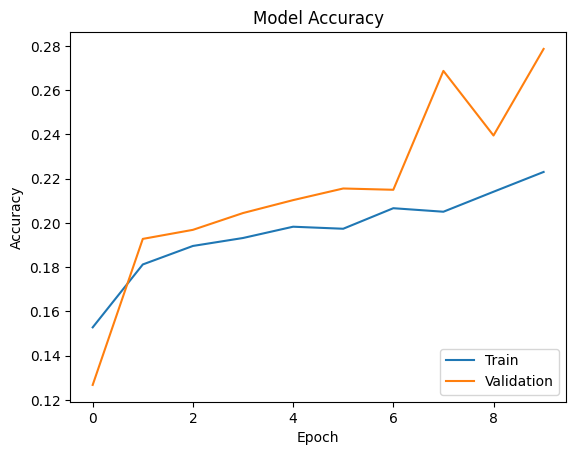

In [31]:
# Plots the training and validation accuracy over the number of epochs.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

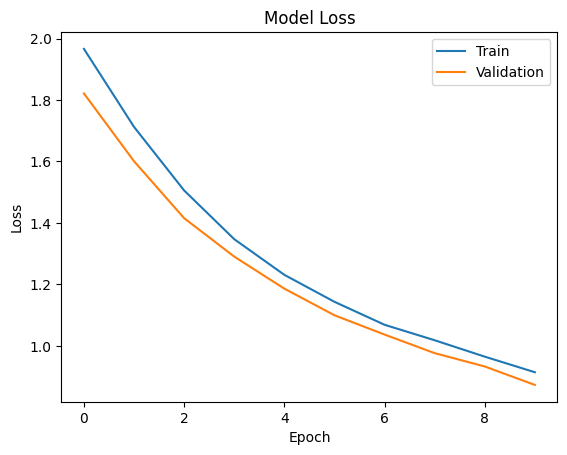

In [ ]:
# Plots the training and validation loss over the number of epochs.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

**Putting existing code into one cell:**

In [ ]:
# Built-in Imports
import random
# Library Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Keras Imports
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import get_file, to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

DATA_NAME = "BloodMNIST"

!wget https://raw.githubusercontent.com/MedMNIST/MedMNIST/main/medmnist/info.py
from info import INFO
data = INFO[DATA_NAME.lower()]
# Downloads the dataset file hosted on Zenodo.
file_path = get_file(fname="dataset.npz",
                     origin=data["url"],
                     md5_hash=data["MD5"])

# Loads the downloaded NumPy object.
dataset = np.load(file_path)

# Gets the training images and labels from the NumPy object.
train_x = dataset["train_images"]
train_y = dataset["train_labels"]

# Gets the validation images and labels from the NumPy object.
val_x = dataset["val_images"]
val_y = dataset["val_labels"]

# Gets the testing images and labels from the NumPy object.
test_x = dataset["test_images"]
test_y = dataset["test_labels"]

# Declares a list of labels.
labels = list(data["label"].values()) + ["total"]

# Gets the counts for each label in each of our datasets.
_, train_counts = np.unique(train_y, return_counts=True)
_, val_counts = np.unique(val_y, return_counts=True)
_, test_counts = np.unique(test_y, return_counts=True)

# Prints the counts for each label from each dataset.
print(pd.DataFrame(list(zip(np.append(train_counts, [sum(train_counts)]),
                            np.append(val_counts, [sum(val_counts)]),
                            np.append(test_counts, [sum(test_counts)]))),
                   index=labels, columns=["Train", "Val", "Test"]))

# Defines the data generator that will be used to augment the images as they are loaded.
data_generator = ImageDataGenerator(featurewise_center=True,
                                    featurewise_std_normalization=True,
                                    horizontal_flip=True,
                                    vertical_flip=True)

data_generator.fit(np.append(train_x, val_x, 0))

# Define the input layer of the model with the size of an image.
input = layers.Input(shape=train_x[0].shape)

# Defines the first convolutional layer with max pooling.
conv_1 = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(input)
pool_1 = layers.MaxPool2D(pool_size=(2, 2))(conv_1)

# Defines the second convolutional layer with max pooling.
conv_2 = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(pool_1)
pool_2 = layers.MaxPool2D(pool_size=(2, 2))(conv_2)

# Flattens the outputs of the convolutoonal layers into a one dimensional array.
flatten = layers.Flatten()(pool_2)

# Defines the output layer of the model a number of output nodes equal to the number of classes.
output = layers.Dense(units=8, activation="softmax")(flatten)

# Initilises the defined model and prints summary of the model.
model = Model(inputs=input, outputs=output, name="Model")
model.summary()

# Defines the parameters used during training.
BATCH_SIZE = 64
NUM_EPOCHS = 10
LEARNING_RATE = 0.001

# Defines the optimiser used to adjust the model weights and compiles the model.
optimiser = SGD(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimiser, loss="categorical_crossentropy", metrics=["accuracy"])

# We use the data generator to pass the training and validation data to the model to train it.
history = model.fit(data_generator.flow(train_x, to_categorical(train_y), batch_size=BATCH_SIZE),
                    steps_per_epoch=len(train_x) / BATCH_SIZE,
                    validation_data=data_generator.flow(val_x, to_categorical(val_y), batch_size=BATCH_SIZE),
                    validation_steps=len(val_x) / BATCH_SIZE,
                    epochs=NUM_EPOCHS)

In [33]:
# Built-in Imports
import random
# Library Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Keras Imports
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import get_file, to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

DATA_NAME = "BloodMNIST"

!wget https://raw.githubusercontent.com/MedMNIST/MedMNIST/main/medmnist/info.py
from info import INFO
data = INFO[DATA_NAME.lower()]
# Downloads the dataset file hosted on Zenodo.
file_path = get_file(fname="dataset.npz",
                     origin=data["url"],
                     md5_hash=data["MD5"])

# Loads the downloaded NumPy object.
dataset = np.load(file_path)

# Gets the training images and labels from the NumPy object.
train_x = dataset["train_images"]
train_y = dataset["train_labels"]

# Gets the validation images and labels from the NumPy object.
val_x = dataset["val_images"]
val_y = dataset["val_labels"]

# Gets the testing images and labels from the NumPy object.
test_x = dataset["test_images"]
test_y = dataset["test_labels"]

# Declares a list of labels.
labels = list(data["label"].values()) + ["total"]

# Gets the counts for each label in each of our datasets.
_, train_counts = np.unique(train_y, return_counts=True)
_, val_counts = np.unique(val_y, return_counts=True)
_, test_counts = np.unique(test_y, return_counts=True)

# Prints the counts for each label from each dataset.
#print(pd.DataFrame(list(zip(np.append(train_counts, [sum(train_counts)]),
                            #np.append(val_counts, [sum(val_counts)]),
                            #np.append(test_counts, [sum(test_counts)]))),
                   #index=labels, columns=["Train", "Val", "Test"]))

# Define the input layer of the model with the size of an image.
input = layers.Input(shape=train_x[0].shape)

# Defines the first convolutional layer with max pooling.
conv_1 = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(input)
pool_1 = layers.MaxPool2D(pool_size=(2, 2))(conv_1)

# Defines the second convolutional layer with max pooling.
conv_2 = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(pool_1)
pool_2 = layers.MaxPool2D(pool_size=(2, 2))(conv_2)

# Flattens the outputs of the convolutional layers into a one-dimensional array.
flatten = layers.Flatten()(pool_2)

# Adds dropout to prevent overfitting.
dropout = layers.Dropout(0.5)(flatten)

# Defines the output layer of the model with a number of output nodes equal to the number of classes.
output = layers.Dense(units=8, activation="softmax")(dropout)

# Initializes the defined model and prints the summary of the model.
model = Model(inputs=input, outputs=output, name="Model")
model.summary()

# Defines the parameters used during training.
BATCH_SIZE = 64
NUM_EPOCHS = 10  ## Increased number of epochs for better training
LEARNING_RATE = 0.001

# Defines the optimizer used to adjust the model weights and compiles the model.
optimizer = SGD(learning_rate=LEARNING_RATE)

# Adds learning rate scheduling to the optimizer.
#lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-6)

model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

# Initializes image data generators with data augmentation.
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

# Fits the model using data generators for training and validation.
history = model.fit(
    train_datagen.flow(train_x, to_categorical(train_y), batch_size=BATCH_SIZE),
    steps_per_epoch=len(train_x) / BATCH_SIZE,
    epochs=NUM_EPOCHS,
    validation_data=val_datagen.flow(val_x, to_categorical(val_y), batch_size=BATCH_SIZE),
    validation_steps=len(val_x) / BATCH_SIZE,
    #callbacks=[lr_scheduler]
    )


--2024-03-30 23:37:49--  https://raw.githubusercontent.com/MedMNIST/MedMNIST/main/medmnist/info.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27766 (27K) [text/plain]
Saving to: ‘info.py.5’

info.py.5           100%[===================>]  27.12K  --.-KB/s    in 0.002s  

2024-03-30 23:37:49 (17.1 MB/s) - ‘info.py.5’ saved [27766/27766]

Model: "Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 3)]       0         
                                                                 
 conv2d_13 (Conv2D)          (None, 26, 26, 32)        896       
                                                                 
 max_pooling2

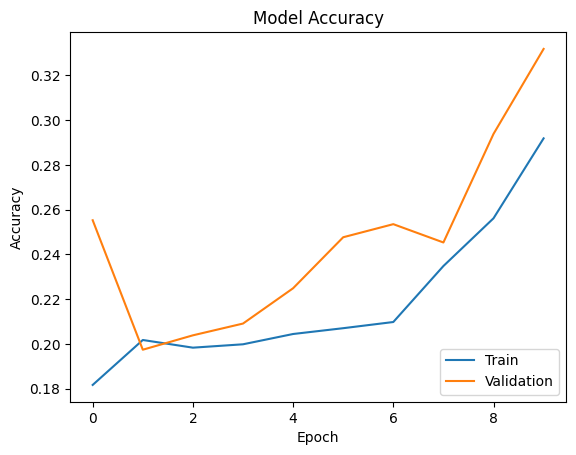

In [36]:
# Plots the training and validation accuracy over the number of epochs.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [77]:
##trying without the dropout layer

# Built-in Imports
import random
# Library Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Keras Imports
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import get_file, to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

DATA_NAME = "BloodMNIST"

!wget https://raw.githubusercontent.com/MedMNIST/MedMNIST/main/medmnist/info.py
from info import INFO
data = INFO[DATA_NAME.lower()]
# Downloads the dataset file hosted on Zenodo.
file_path = get_file(fname="dataset.npz",
                     origin=data["url"],
                     md5_hash=data["MD5"])

# Loads the downloaded NumPy object.
dataset = np.load(file_path)

# Gets the training images and labels from the NumPy object.
train_x = dataset["train_images"]
train_y = dataset["train_labels"]

# Gets the validation images and labels from the NumPy object.
val_x = dataset["val_images"]
val_y = dataset["val_labels"]

# Gets the testing images and labels from the NumPy object.
test_x = dataset["test_images"]
test_y = dataset["test_labels"]

# Declares a list of labels.
labels = list(data["label"].values()) + ["total"]

# Gets the counts for each label in each of our datasets.
#_, train_counts = np.unique(train_y, return_counts=True)
#_, val_counts = np.unique(val_y, return_counts=True)
#_, test_counts = np.unique(test_y, return_counts=True)

# Prints the counts for each label from each dataset.
#print(pd.DataFrame(list(zip(np.append(train_counts, [sum(train_counts)]),
                            #np.append(val_counts, [sum(val_counts)]),
                            #np.append(test_counts, [sum(test_counts)]))),
                   #index=labels, columns=["Train", "Val", "Test"]))

# Define the input layer of the model with the size of an image.
input = layers.Input(shape=train_x[0].shape)

# Defines the first convolutional layer with max pooling.
conv_1 = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(input)
pool_1 = layers.MaxPool2D(pool_size=(2, 2))(conv_1)

# Defines the second convolutional layer with max pooling.
conv_2 = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(pool_1)
pool_2 = layers.MaxPool2D(pool_size=(2, 2))(conv_2)

# Defines the third convolutional layer with max pooling.
conv_3 = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(pool_2)
pool_3 = layers.MaxPool2D(pool_size=(2, 2))(conv_3)

# Flattens the outputs of the convolutional layers into a one-dimensional array.
flatten = layers.Flatten()(pool_3)

# Adds dropout to prevent overfitting.
dropout = layers.Dropout(0.2)(flatten)

# Defines the output layer of the model with a number of output nodes equal to the number of classes.
output = layers.Dense(units=8, activation="softmax")(flatten)

# Initializes the defined model and prints the summary of the model.
model = Model(inputs=input, outputs=output, name="Model")
model.summary()

# Defines the parameters used during training.
BATCH_SIZE = 64
NUM_EPOCHS = 10  ## Increased number of epochs for better training
LEARNING_RATE = 0.001 #increased

# Defines the optimizer used to adjust the model weights and compiles the model.
optimizer = SGD(learning_rate=LEARNING_RATE)

# Adds learning rate scheduling to the optimizer.
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-6)

model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

# Initializes image data generators with data augmentation.
#train_datagen = ImageDataGenerator(
#    rescale=1./255,
#    rotation_range=20,
#    width_shift_range=0.2,
#    height_shift_range=0.2,
#    shear_range=0.2,
#    zoom_range=0.2,
#    horizontal_flip=True,
#    fill_mode='nearest')

train_datagen = ImageDataGenerator(featurewise_center=True,
                                    featurewise_std_normalization=True,
                                    horizontal_flip=True,
                                    vertical_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

# Fits the model using data generators for training and validation.
history = model.fit(
    train_datagen.flow(train_x, to_categorical(train_y), batch_size=BATCH_SIZE),
    steps_per_epoch=len(train_x) / BATCH_SIZE,
    epochs=NUM_EPOCHS,
    validation_data=val_datagen.flow(val_x, to_categorical(val_y), batch_size=BATCH_SIZE),
    validation_steps=len(val_x) / BATCH_SIZE,
    callbacks=[lr_scheduler]
    )


--2024-03-31 00:24:50--  https://raw.githubusercontent.com/MedMNIST/MedMNIST/main/medmnist/info.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27766 (27K) [text/plain]
Saving to: ‘info.py.27’

info.py.27          100%[===================>]  27.12K  --.-KB/s    in 0.002s  

2024-03-31 00:24:50 (16.6 MB/s) - ‘info.py.27’ saved [27766/27766]

Model: "Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_25 (InputLayer)       [(None, 28, 28, 3)]       0         
                                                                 
 conv2d_68 (Conv2D)          (None, 26, 26, 32)        896       
                                                                 
 max_poolin

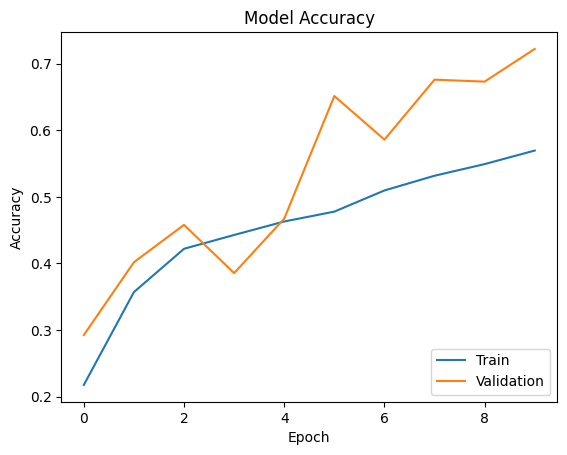

In [50]:
# with 2 conv layers

# Plots the training and validation accuracy over the number of epochs.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

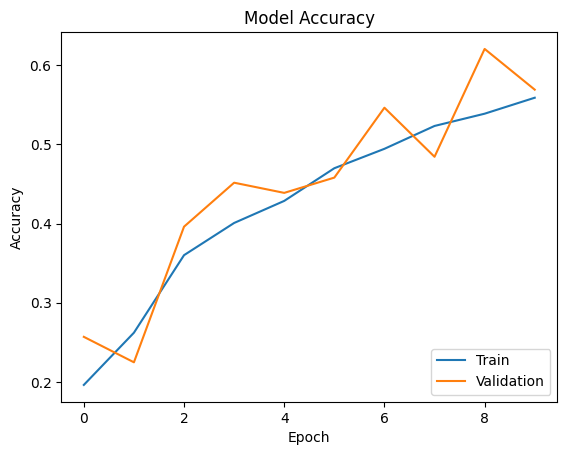

In [52]:
# with 3 conv layers

# Plots the training and validation accuracy over the number of epochs.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

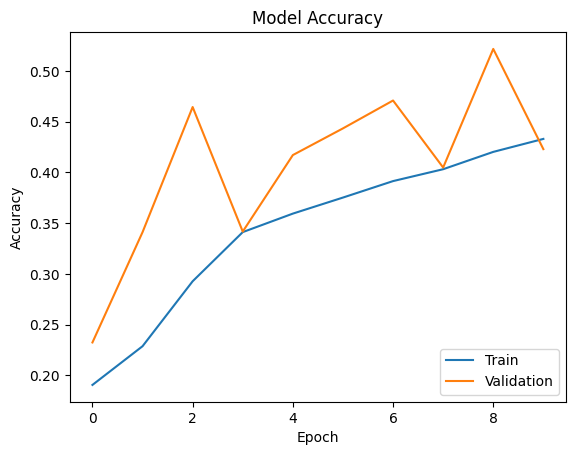

In [54]:
# with 3 conv layers and dropout layer

# Plots the training and validation accuracy over the number of epochs.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

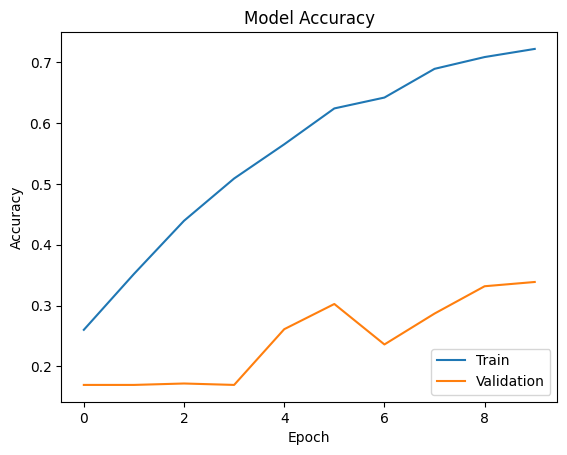

In [62]:
# with 3 conv layers and dropout layer and amended data augmentation

# Plots the training and validation accuracy over the number of epochs.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

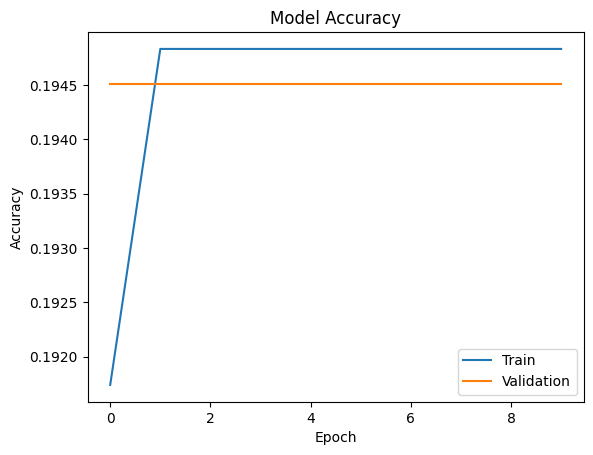

In [68]:
# with 3 conv layers and dropout layer and amended data augmentation

# Plots the training and validation accuracy over the number of epochs.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

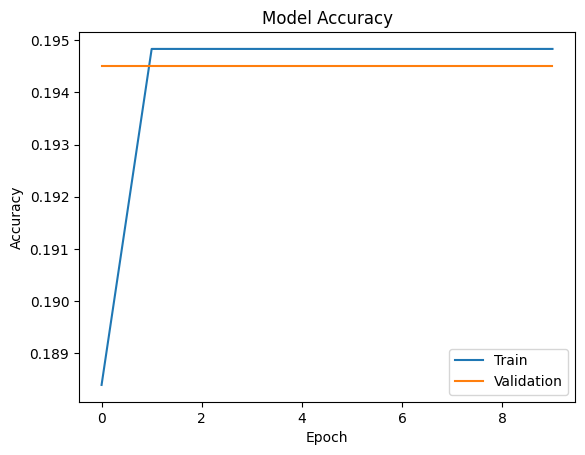

In [70]:
# with 2 conv layers and dropout layer and amended data augmentation

# Plots the training and validation accuracy over the number of epochs.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [79]:
# Define the input layer of the model with the size of an image.
input = layers.Input(shape=train_x[0].shape)

# Defines the first convolutional layer with max pooling.
conv_1 = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(input)
pool_1 = layers.MaxPool2D(pool_size=(2, 2))(conv_1)

# Defines the second convolutional layer with max pooling.
conv_2 = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(pool_1)
pool_2 = layers.MaxPool2D(pool_size=(2, 2))(conv_2)

# Defines the third convolutional layer with max pooling.
conv_3 = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(pool_2)
pool_3 = layers.MaxPool2D(pool_size=(2, 2))(conv_3)

# Flattens the outputs of the convolutional layers into a one-dimensional array.
flatten = layers.Flatten()(pool_3)

# Adds dropout to prevent overfitting.
dropout = layers.Dropout(0.2)(flatten)

# Defines the output layer of the model with a number of output nodes equal to the number of classes.
output = layers.Dense(units=8, activation="softmax")(flatten)

# Initializes the defined model and prints the summary of the model.
model = Model(inputs=input, outputs=output, name="Model")
model.summary()

# Defines the parameters used during training.
BATCH_SIZE = 64
NUM_EPOCHS = 10  ## Increased number of epochs for better training
LEARNING_RATE = 0.001 #increased

# Defines the optimizer used to adjust the model weights and compiles the model.
optimizer = SGD(learning_rate=LEARNING_RATE)

# Adds learning rate scheduling to the optimizer.
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-6)

model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

# Initializes image data generators with data augmentation.
#train_datagen = ImageDataGenerator(
#    rescale=1./255,
#    rotation_range=20,
#    width_shift_range=0.2,
#    height_shift_range=0.2,
#    shear_range=0.2,
#    zoom_range=0.2,
#    horizontal_flip=True,
#    fill_mode='nearest')

train_datagen = ImageDataGenerator(featurewise_center=True,
                                    featurewise_std_normalization=True,
                                    horizontal_flip=True,
                                    vertical_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

# Fits the model using data generators for training and validation.
history = model.fit(
    train_datagen.flow(train_x, to_categorical(train_y), batch_size=BATCH_SIZE),
    steps_per_epoch=len(train_x) / BATCH_SIZE,
    epochs=NUM_EPOCHS,
    validation_data=val_datagen.flow(val_x, to_categorical(val_y), batch_size=BATCH_SIZE),
    validation_steps=len(val_x) / BATCH_SIZE,
    callbacks=[lr_scheduler]
    )


Model: "Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_26 (InputLayer)       [(None, 28, 28, 3)]       0         
                                                                 
 conv2d_71 (Conv2D)          (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_70 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_72 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_71 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_73 (Conv2D)          (None, 3, 3, 64)          36928 

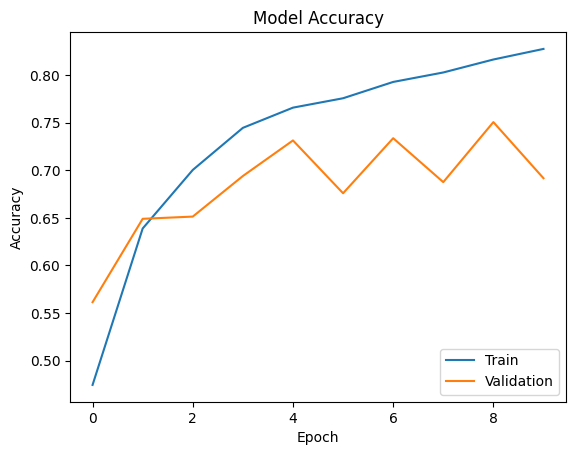

In [80]:
# Plots the training and validation accuracy over the number of epochs.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [83]:
# Define the input layer of the model with the size of an image.
input = layers.Input(shape=train_x[0].shape)

# Defines the first convolutional layer with max pooling.
conv_1 = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(input)
pool_1 = layers.MaxPool2D(pool_size=(2, 2))(conv_1)

# Defines the second convolutional layer with max pooling.
conv_2 = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(pool_1)
pool_2 = layers.MaxPool2D(pool_size=(2, 2))(conv_2)

# Defines the third convolutional layer with max pooling.
conv_3 = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(pool_2)
pool_3 = layers.MaxPool2D(pool_size=(2, 2))(conv_3)

# Flattens the outputs of the convolutional layers into a one-dimensional array.
flatten = layers.Flatten()(pool_3)

# Adds dropout to prevent overfitting.
dropout = layers.Dropout(0.2)(flatten)

# Defines the output layer of the model with a number of output nodes equal to the number of classes.
output = layers.Dense(units=8, activation="softmax")(flatten)

# Initializes the defined model and prints the summary of the model.
model = Model(inputs=input, outputs=output, name="Model")
model.summary()

# Defines the parameters used during training.
BATCH_SIZE = 64
NUM_EPOCHS = 10  ## Increased number of epochs for better training
LEARNING_RATE = 0.00001 #decreased

# Defines the optimizer used to adjust the model weights and compiles the model.
optimizer = SGD(learning_rate=LEARNING_RATE)

# Adds learning rate scheduling to the optimizer.
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-6)

model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

# Initializes image data generators with data augmentation.
#train_datagen = ImageDataGenerator(
#    rescale=1./255,
#    rotation_range=20,
#    width_shift_range=0.2,
#    height_shift_range=0.2,
#    shear_range=0.2,
#    zoom_range=0.2,
#    horizontal_flip=True,
#    fill_mode='nearest')

train_datagen = ImageDataGenerator(featurewise_center=True,
                                    featurewise_std_normalization=True,
                                    horizontal_flip=True,
                                    vertical_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

# Fits the model using data generators for training and validation.
history = model.fit(
    train_datagen.flow(train_x, to_categorical(train_y), batch_size=BATCH_SIZE),
    steps_per_epoch=len(train_x) / BATCH_SIZE,
    epochs=NUM_EPOCHS,
    validation_data=val_datagen.flow(val_x, to_categorical(val_y), batch_size=BATCH_SIZE),
    validation_steps=len(val_x) / BATCH_SIZE,
    callbacks=[lr_scheduler]
    )


Model: "Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_28 (InputLayer)       [(None, 28, 28, 3)]       0         
                                                                 
 conv2d_77 (Conv2D)          (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_76 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_78 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_77 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_79 (Conv2D)          (None, 3, 3, 64)          36928 

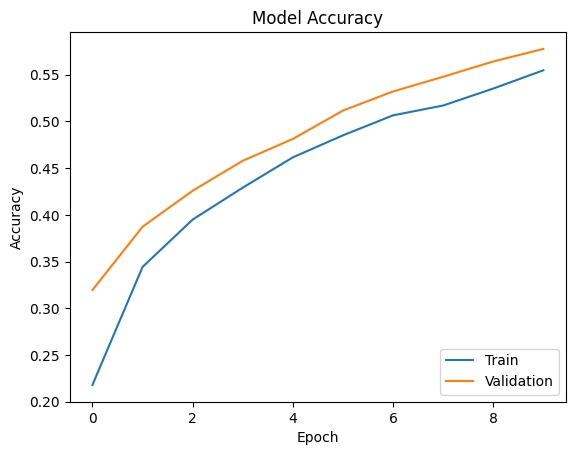

In [84]:
# Plots the training and validation accuracy over the number of epochs.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [86]:
# Define the input layer of the model with the size of an image.
input = layers.Input(shape=train_x[0].shape)

# Defines the first convolutional layer with max pooling.
conv_1 = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(input)
pool_1 = layers.MaxPool2D(pool_size=(2, 2))(conv_1)

# Defines the second convolutional layer with max pooling.
conv_2 = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(pool_1)
pool_2 = layers.MaxPool2D(pool_size=(2, 2))(conv_2)

# Defines the third convolutional layer with max pooling.
conv_3 = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(pool_2)
pool_3 = layers.MaxPool2D(pool_size=(2, 2))(conv_3)

# Flattens the outputs of the convolutional layers into a one-dimensional array.
flatten = layers.Flatten()(pool_3)

# Adds dropout to prevent overfitting.
dropout = layers.Dropout(0.5)(flatten) #increased dropout rate

# Defines the output layer of the model with a number of output nodes equal to the number of classes.
output = layers.Dense(units=8, activation="softmax")(flatten)

# Initializes the defined model and prints the summary of the model.
model = Model(inputs=input, outputs=output, name="Model")
model.summary()

# Defines the parameters used during training.
BATCH_SIZE = 64
NUM_EPOCHS = 10  ## Increased number of epochs for better training
LEARNING_RATE = 0.00001 #decreased

# Defines the optimizer used to adjust the model weights and compiles the model.
optimizer = SGD(learning_rate=LEARNING_RATE)

# Adds learning rate scheduling to the optimizer.
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-6)

model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

# Initializes image data generators with data augmentation.
#train_datagen = ImageDataGenerator(
#    rescale=1./255,
#    rotation_range=20,
#    width_shift_range=0.2,
#    height_shift_range=0.2,
#    shear_range=0.2,
#    zoom_range=0.2,
#    horizontal_flip=True,
#    fill_mode='nearest')

train_datagen = ImageDataGenerator(featurewise_center=True,
                                    featurewise_std_normalization=True,
                                    horizontal_flip=True,
                                    vertical_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

# Fits the model using data generators for training and validation.
history = model.fit(
    train_datagen.flow(train_x, to_categorical(train_y), batch_size=BATCH_SIZE),
    steps_per_epoch=len(train_x) / BATCH_SIZE,
    epochs=NUM_EPOCHS,
    validation_data=val_datagen.flow(val_x, to_categorical(val_y), batch_size=BATCH_SIZE),
    validation_steps=len(val_x) / BATCH_SIZE,
    callbacks=[lr_scheduler]
    )


Model: "Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_30 (InputLayer)       [(None, 28, 28, 3)]       0         
                                                                 
 conv2d_83 (Conv2D)          (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_82 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_84 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_83 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_85 (Conv2D)          (None, 3, 3, 64)          36928 

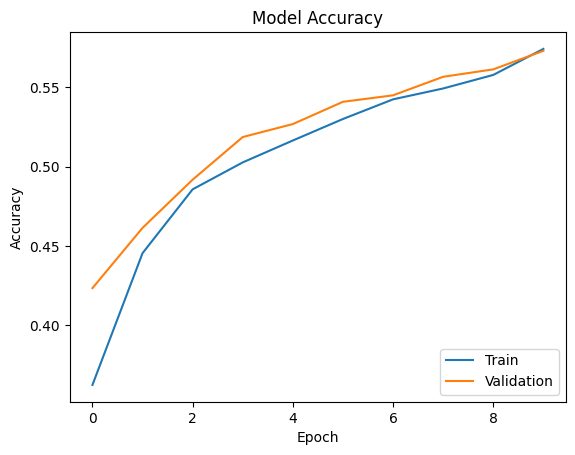

In [87]:
# Plots the training and validation accuracy over the number of epochs.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [88]:
# Define the input layer of the model with the size of an image.
input = layers.Input(shape=train_x[0].shape)

# Defines the first convolutional layer with max pooling.
conv_1 = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(input)
pool_1 = layers.MaxPool2D(pool_size=(2, 2))(conv_1)

# Defines the second convolutional layer with max pooling.
conv_2 = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(pool_1)
pool_2 = layers.MaxPool2D(pool_size=(2, 2))(conv_2)

# Defines the third convolutional layer with max pooling.
#conv_3 = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(pool_2)
#pool_3 = layers.MaxPool2D(pool_size=(2, 2))(conv_3)

# Flattens the outputs of the convolutional layers into a one-dimensional array.
flatten = layers.Flatten()(pool_2)

# Adds dropout to prevent overfitting.
dropout = layers.Dropout(0.5)(flatten)

# Defines the output layer of the model with a number of output nodes equal to the number of classes.
output = layers.Dense(units=8, activation="softmax")(flatten)

# Initializes the defined model and prints the summary of the model.
model = Model(inputs=input, outputs=output, name="Model")
model.summary()

# Defines the parameters used during training.
BATCH_SIZE = 64
NUM_EPOCHS = 10  ## Increased number of epochs for better training
LEARNING_RATE = 0.00001 #decreased

# Defines the optimizer used to adjust the model weights and compiles the model.
optimizer = SGD(learning_rate=LEARNING_RATE)

# Adds learning rate scheduling to the optimizer.
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-6)

model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

# Initializes image data generators with data augmentation.
#train_datagen = ImageDataGenerator(
#    rescale=1./255,
#    rotation_range=20,
#    width_shift_range=0.2,
#    height_shift_range=0.2,
#    shear_range=0.2,
#    zoom_range=0.2,
#    horizontal_flip=True,
#    fill_mode='nearest')

train_datagen = ImageDataGenerator(featurewise_center=True,
                                    featurewise_std_normalization=True,
                                    horizontal_flip=True,
                                    vertical_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

# Fits the model using data generators for training and validation.
history = model.fit(
    train_datagen.flow(train_x, to_categorical(train_y), batch_size=BATCH_SIZE),
    steps_per_epoch=len(train_x) / BATCH_SIZE,
    epochs=NUM_EPOCHS,
    validation_data=val_datagen.flow(val_x, to_categorical(val_y), batch_size=BATCH_SIZE),
    validation_steps=len(val_x) / BATCH_SIZE,
    callbacks=[lr_scheduler]
    )


Model: "Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_31 (InputLayer)       [(None, 28, 28, 3)]       0         
                                                                 
 conv2d_86 (Conv2D)          (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_85 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_87 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_86 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_33 (Flatten)        (None, 1600)              0     

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1872: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


186/186 [==============================] - 3s 11ms/step - loss: 9.0188 - accuracy: 0.2325 - val_loss: 2.0603 - val_accuracy: 0.3522 - lr: 1.0000e-05
Epoch 2/10
186/186 [==============================] - 1s 6ms/step - loss: 3.9370 - accuracy: 0.3829 - val_loss: 2.0551 - val_accuracy: 0.4550 - lr: 1.0000e-05
Epoch 3/10
186/186 [==============================] - 1s 6ms/step - loss: 3.1594 - accuracy: 0.4454 - val_loss: 2.0529 - val_accuracy: 0.5082 - lr: 1.0000e-05
Epoch 4/10
186/186 [==============================] - 1s 7ms/step - loss: 2.7877 - accuracy: 0.4806 - val_loss: 2.0518 - val_accuracy: 0.5035 - lr: 1.0000e-05
Epoch 5/10
186/186 [==============================] - 1s 7ms/step - loss: 2.5539 - accuracy: 0.4992 - val_loss: 2.0504 - val_accuracy: 0.5502 - lr: 1.0000e-05
Epoch 6/10
186/186 [==============================] - 1s 7ms/step - loss: 2.3080 - accuracy: 0.5204 - val_loss: 2.0507 - val_accuracy: 0.5572 - lr: 1.0000e-05
Epoch 7/10
186/186 [==============================] - 1s

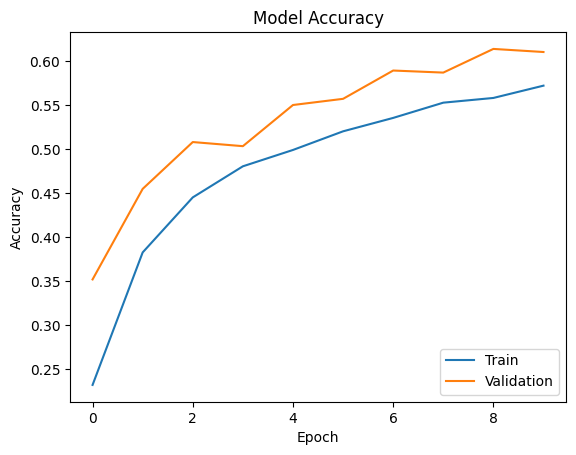

In [89]:
# Plots the training and validation accuracy over the number of epochs.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

^ the increased dropout rate improves the minimum accuracy, but does not increase the peak accuracy